# Dataset para ver la relacion entre el historial familiar , y la salud mental de las personas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df2 =pd.read_csv("../Datasets/survey.csv") #save fig


## Genero un metodo para que me muestre la cabezera del Dataset y analizar de forma generica las columnas que hay

In [3]:
df2.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Informacion básica de los tipos de datos del CSV importado

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Genero un dataset nuevo, sólo con las columnas que me interesan

In [5]:
df2_1 = df2[["family_history" , "mental_health_consequence", "work_interfere"]]

In [6]:
df2_1

,family_history,mental_health_consequence,work_interfere
0,No,No,Often
1,No,Maybe,Rarely
2,No,No,Rarely
3,Yes,Yes,Often
4,No,No,Never
...,...,...,...
1254,No,No,NaN
1255,Yes,No,Often
1256,Yes,Yes,Sometimes
1257,No,Yes,NaN


## Hago un mapeo de las variables , para pasarlas a valores numéricos y poder seguir trabajando estadisticamente con ellas

In [7]:
# Definir el mapeo de valores
mapeo = {
    "No": 0,
    "Yes": 1,
    "Maybe": 0.5,
    "Often": 3,
    "Sometimes": 2,
    "Rarely": 1,
    "Never": 0
}


In [8]:
df2_1 = df2_1.replace(mapeo)

C:\Users\34666\AppData\Local\Temp\ipykernel_7220\2640172778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2_1 = df2_1.replace(mapeo)


## Elimino los datos nulos de la columnas

In [9]:
df2_1 = df2_1.dropna(subset=["work_interfere"])

In [10]:
df2_1

,family_history,mental_health_consequence,work_interfere
0,0,0.0,3.0
1,0,0.5,1.0
2,0,0.0,1.0
3,1,1.0,3.0
4,0,0.0,0.0
...,...,...,...
1252,1,1.0,2.0
1253,1,0.5,1.0
1255,1,0.0,3.0
1256,1,1.0,2.0


## Agrupo en funcion del historial genético

In [11]:

# Agrupo en funcion del historial genético
df_grouped = df2_1[df2_1["family_history"] == 1]
df_grouped2 = df2_1[df2_1["family_history"] == 0]

#------------------------------------

# Dentro de la agrupación anterior de los casos que si han tenido historial genético agrupo a su vez por las puntuaciones de la salud mental actual
mental_health_count = df_grouped[df_grouped["mental_health_consequence"] == 1].shape[0]
mental_health_count2 = df_grouped[df_grouped["mental_health_consequence"] == 0.5].shape[0]
mental_health_count3 = df_grouped[df_grouped["mental_health_consequence"] == 0].shape[0]

#------------------------------------

# Dentro de la agrupación anterior de los casos que no han tenido historial genético agrupo a su vez por las puntuaciones de la salud mental actual2
mental_health_count1 = df_grouped2[df_grouped2["mental_health_consequence"] == 1].shape[0]
mental_health_count21 = df_grouped2[df_grouped2["mental_health_consequence"] == 0.5].shape[0]
mental_health_count31 = df_grouped2[df_grouped2["mental_health_consequence"] == 0].shape[0]





#calculo el total de las agrupaciones en funcion del historial

total = mental_health_count3 + mental_health_count2 + mental_health_count
total2 = mental_health_count1 + mental_health_count21 + mental_health_count31
# Mostrar resultados



## porcentaje de gente que si ha derivado problemas de salud mental, agrupados porel historial si o el historial no

In [12]:

# Calcular porcentajes
porcentaje_si = (mental_health_count / total) * 100
porcentaje_quizas = (mental_health_count2 / total) * 100
porcentaje_no = (mental_health_count3 / total) * 100 

porcentaje_si_1 = (mental_health_count1 / total2) * 100
porcentaje_quizas_1 = (mental_health_count21 / total2) * 100
porcentaje_no_1 = (mental_health_count31 / total2) * 100 


print(round(porcentaje_si,2),round(porcentaje_si_1,2),round(porcentaje_no,2),round(porcentaje_no_1,2),round(porcentaje_quizas,2),round(porcentaje_quizas_1,2)) #porcentaje de gente que si ha derivado problemas de salud mental, agrupados porel historial si o el historial no

29.18 23.63 30.96 39.38 39.87 37.0


## Visualizacion de los dataset de las agrupaciones de los que si y nohan tenido problemas de salud mental de origen genetico

In [13]:
df_grouped

,family_history,mental_health_consequence,work_interfere
3,1,1.0,3.0
5,1,0.0,2.0
6,1,0.5,2.0
8,1,0.5,2.0
12,1,1.0,2.0
...,...,...,...
1252,1,1.0,2.0
1253,1,0.5,1.0
1255,1,0.0,3.0
1256,1,1.0,2.0


In [14]:
df_grouped2

,family_history,mental_health_consequence,work_interfere
0,0,0.0,3.0
1,0,0.5,1.0
2,0,0.0,1.0
4,0,0.0,0.0
7,0,0.0,0.0
...,...,...,...
1239,0,0.5,2.0
1241,0,0.5,3.0
1242,0,0.5,1.0
1246,0,0.0,0.0


## Visualización de los dos dataset anteriores

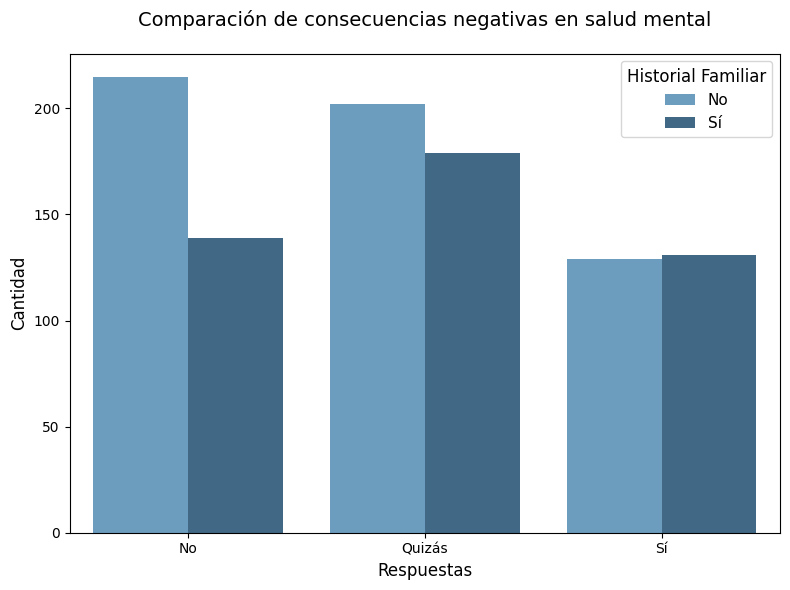

In [15]:
df_grouped = df2_1.groupby(["family_history", "mental_health_consequence"]).size().reset_index(name="count")
# Mapear los valores numéricos a etiquetas descriptivas
df_grouped["family_history"] = df_grouped["family_history"].map({0: "No", 1: "Sí"})
df_grouped["mental_health_consequence"] = df_grouped["mental_health_consequence"].map({0.0: "No", 0.5: "Quizás", 1.0: "Sí"})
# Crear el gráfico de barras agrupadas
plt.figure(figsize=(8, 6))  # Ajustar tamaño si es necesario
sns.barplot(
    x="mental_health_consequence",
    y="count",
    hue="family_history",
    data=df_grouped,
    palette="Blues_d",
    order=["No", "Quizás", "Sí"]  # el orden de las categorías
)
# Configurar etiquetas y título
plt.xlabel("Respuestas", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.title("Comparación de consecuencias negativas en salud mental", fontsize=14, pad=20)
# Personalizar leyenda
plt.legend(title="Historial Familiar", title_fontsize=12, fontsize=11)
# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()